In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data =  pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_3/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X_data = data['YearsExperience']
y_data = data['Salary']

In [5]:
X_data.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [6]:
y_data.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

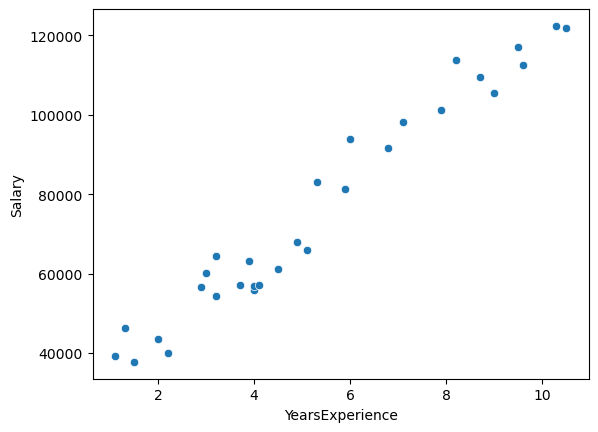

In [7]:
sns.scatterplot(x='YearsExperience', y ='Salary' , data = data)

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    X_data, y_data, random_state = 42)

In [11]:
train_input.shape

(22,)

In [13]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
train_input.shape

(22, 1)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_ ,lr.intercept_ ) # 기울기, y절편

[9371.0160797] 25478.127436000374


In [15]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9553880313075513
0.9347210011126782


In [16]:
y_pred = lr.predict(test_input)

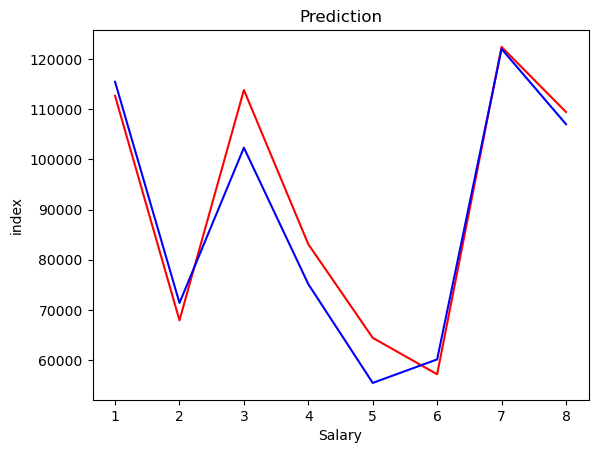

In [17]:
c = [i for i in range (1,len(test_target)+1,1)]
plt.plot(c,test_target,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

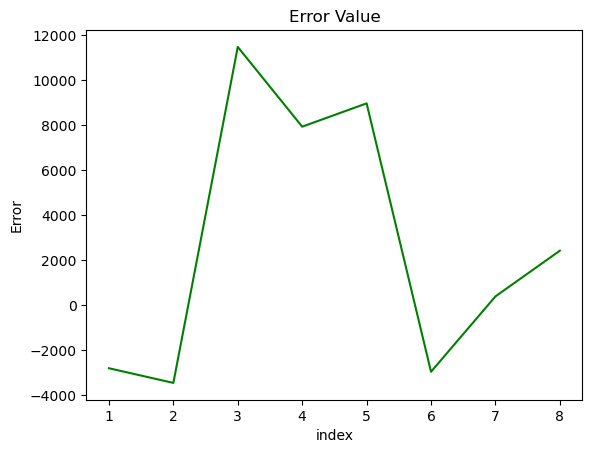

In [18]:
c = [i for i in range(1,len(test_target)+1,1)]
plt.plot(c,test_target - y_pred, color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [19]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
# calculate Mean square error
mse = mean_squared_error(test_target,y_pred)

In [21]:
# Calculate R square vale
rsq = r2_score(test_target,y_pred)

In [22]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 38802588.99247065
r square : 0.9347210011126782


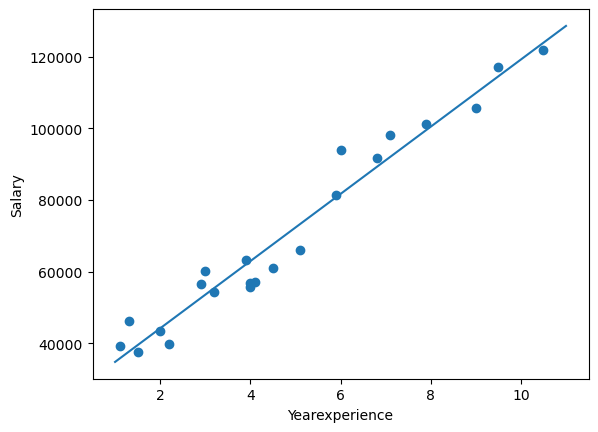

In [23]:
plt.scatter(train_input, train_target)
#훈련 데이터 선점도
plt.plot([1,11], [1*lr.coef_ + lr.intercept_, 11 * lr.coef_ + lr.intercept_])
plt.xlabel('Yearexperience')
plt.ylabel('Salary')
plt.show()

In [24]:
# 그림의 방정식대로면 농어의 무게가 0보다 작아질 수도 있음
# 다항 회귀를 통해 극복
#길이를 제곱한 항을 훈련 세트에 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))
print(train_poly.shape, test_poly.shape)

(22, 2) (8, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  89.21829868 8384.71480107] 27517.99923444912


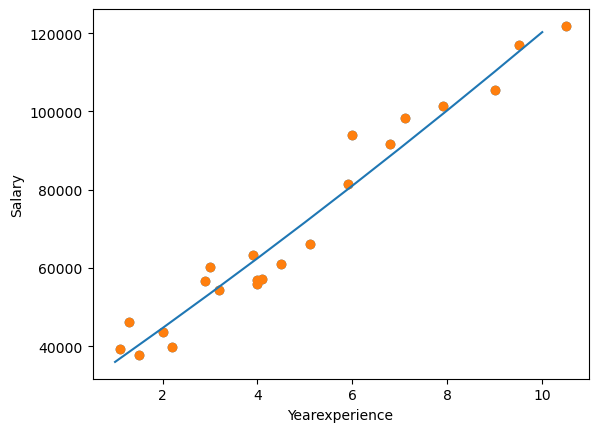

In [27]:
#다항식의 산점도
plt.scatter(train_input, train_target)
point = np.arange(1, 11)
plt.scatter(train_input, train_target)
plt.plot(point, 89.218 * point **2 + 8384.71*point + 27517.99)
plt.xlabel('Yearexperience')
plt.ylabel('Salary')
plt.show()